In [58]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import cartopy.feature as cfeature
import os 
import cartopy as cartopy
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
path1 = r'C:\Users\kmmra'
path2 = r'C:\Users\kmmra\OneDrive\Desktop\Myself\Data'

# 2020 Global Data 

In [3]:
npzfile=np.load(path1+'\MERRA2_2020_PM25_Variables.npz') # Open .npz file
sorted(npzfile.files)

['BCSMASS',
 'BCSMASS_abbreviation',
 'DUSMASS25',
 'DUSMASS25_abbreviation',
 'OCSMASS',
 'OCSMASS_abbreviation',
 'PM25_formula',
 'SO4SMASS',
 'SO4SMASS_abbreviation',
 'SSSMASS25',
 'SSSMASS25_abbreviation',
 'dates',
 'lat',
 'lon']

In [4]:
DUSMASS25 = np.array(npzfile['DUSMASS25'],dtype = 'float')
OCSMASS   = np.array(npzfile['OCSMASS'],dtype = 'float')
BCSMASS   = np.array(npzfile['BCSMASS'],dtype = 'float')
SSSMASS25 = np.array(npzfile['SSSMASS25'],dtype = 'float')
SO4SMASS  = np.array(npzfile['SO4SMASS'],dtype = 'float')
dates     = np.array(npzfile['dates'],dtype = 'str')
lon       = np.array(npzfile['lon'],dtype = np.float32)
lat       = np.array(npzfile['lat'],dtype = np.float32)

In [5]:
npzfile['PM25_formula']

array('PM2.5 = DUSMASS25 + OCSMASS+ BCSMASS + SSSMASS25 + SO4SMASS* (132.14/96.06)',
      dtype='<U75')

In [6]:
pm25 = DUSMASS25 + OCSMASS+ BCSMASS + SSSMASS25 + SO4SMASS* (132.14/96.06)

In [46]:
pm25_ugm = pm25*1000000

In [97]:
pm25[0,212:,411:416].min()

2.649466334946126e-09

In [50]:
pm25_ugm.max()

8.800935336522564

In [108]:
lon[411]

76.875

In [25]:
lat.shape

(361,)

# Global PM Visualization 

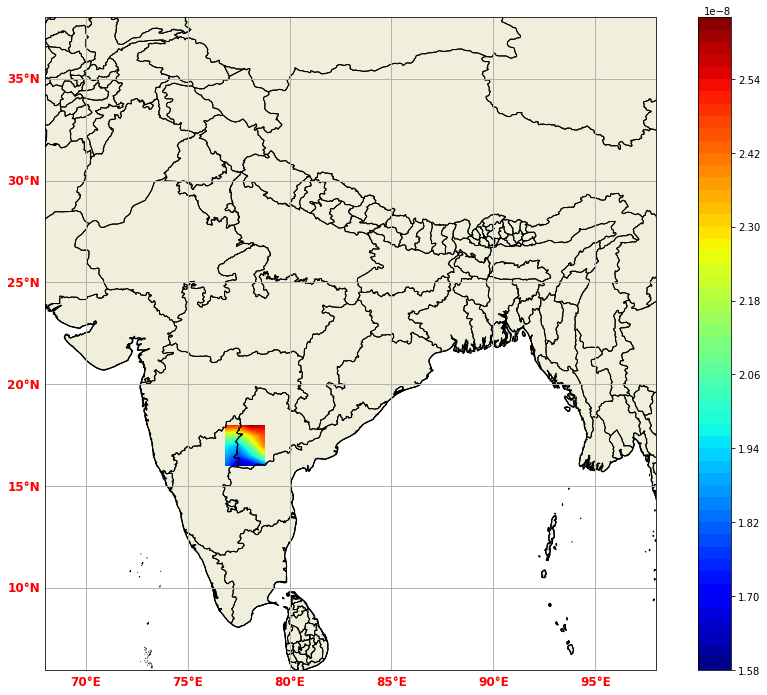

In [107]:

def main():
    plt.figure(figsize=(15,12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([68,98,6,38], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='white')
#     ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES.with_scale('10m'))#,
#                linestyle='-', alpha=.25, color='grey')
    
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()
    filled_c = ax.contourf(lon[411:415],lat[212:217],pm25[0,212:217,411:415],60,
                           transform=ccrs.PlateCarree(),cmap = 'jet')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
    fig.colorbar(filled_c,ax=ax, orientation='vertical')
    plt.show()


if __name__ == '__main__':
    main()

In [9]:
pm_hyd = []
pm_hyd_mean = []
a = np.arange(0,len(dates))
for i in a:
    pm25_1   = pm25[i,212:217,411:416]
    pm_hyd.append(pm25_1)
pm_hyd = np.array(pm_hyd)

In [11]:
np.savez('pm25_2020_hyd_2d',pm_hyd=pm_hyd,lon=lon[411:416],lat = lat[212:217],dates=dates)

In [6]:
pm_hyderabad=np.load(path1+'\pm25_2020_hyd_2d.npz') # Open .npz file
sorted(pm_hyderabad.files)
# pm_hyderabad['pm_hyd'].shape

['dates', 'lat', 'lon', 'pm_hyd']

In [8]:
pm_hyderabad['pm_hyd'].shape

(366, 5, 5)

In [13]:
array =np.arange(0,len(pm_hyderabad['dates']))
pm_hyd_ave= []
for i in array:
    pm_hyd_ave1 = np.mean(pm_hyderabad['pm_hyd'][i,:,:],axis=1)
    pm_hyd_ave.append(pm_hyd_ave1)

In [15]:
pm_hyd_ave=np.array(pm_hyd_ave)

In [16]:
pm_hyd_ave.shape

(366, 5)

In [1]:
from dnppy import download
from datetime import datetime

ModuleNotFoundError: No module named 'dnppy'